# Next Improvement

- Select the simple model with high R-squared is Linear regression model
- `expect_gain` = -0.0003 + 1.0121 * `P_chg_ATO2_ATO1` + 0.0685 * `today_jump`
- Feauture importance are `Date`,`Symbol`,`PriceATO1`,`PriceATO2`,`PriceATC`,`chg_Ct_Ot`,`today_jump`,`P_chg_ATO2_ATO1`,`P_chg_ATC_ATO2`

#### Now
- Add more stock data test. It gona be SET50 stock list 

In [1]:
# load data 

import pandas as pd
from datetime import datetime

df = pd.read_csv('stocksm_atoatcs_202304071240.csv')

print(df.shape)

(321344, 18)


In [2]:
df.head(5)

,_id,Symbol,VolATO1,PriceATO1,Close(T_1),VolATO2,PriceATO2,Price12_30,VolATC,PriceATC,Price16_30,PercentChgSS1,ValueSS1,PercentChgSS2,ValueSS2,PercentChgATC,ValueATC,updated_at
0,1,ADVANC,0,0.0,0.0,0,0.0,0.0,2192000,188.0,188.5,0.0,0,0.0,0,-0.27,412096000,2021-08-31
1,2,AFC,0,0.0,0.0,0,0.0,0.0,100,10.8,10.8,0.0,0,0.0,0,0.00,1080,2021-08-31
2,3,AHC,0,0.0,0.0,0,0.0,0.0,2000,16.6,16.3,0.0,0,0.0,0,1.84,33200,2021-08-31
3,4,AJ,0,0.0,0.0,0,0.0,0.0,104200,19.7,19.7,0.0,0,0.0,0,0.00,2052740,2021-08-31
4,5,ALUCON,0,0.0,0.0,0,0.0,0.0,100,180.0,180.0,0.0,0,0.0,0,0.00,18000,2021-08-31


In [3]:
df.isna().sum()

_id              0
Symbol           0
VolATO1          0
PriceATO1        0
Close(T_1)       0
VolATO2          0
PriceATO2        0
Price12_30       0
VolATC           0
PriceATC         0
Price16_30       0
PercentChgSS1    0
ValueSS1         0
PercentChgSS2    0
ValueSS2         0
PercentChgATC    0
ValueATC         0
updated_at       0
dtype: int64

In [2]:
# Select SET50 stock

set50 = ['ADVANC',
'AOT',
'AWC',
'BANPU',
'BBL',
'BDMS',
'BEM',
'BGRIM',
'BH',
'BTS',
'CBG',
'CENTEL',
'COM7',
'CPALL',
'CPF',
'CPN',
'CRC',
'DELTA',
'EA',
'EGCO',
'GLOBAL',
'GPSC',
'GULF',
'HMPRO',
'INTUCH',
'IVL',
'JMART',
'JMT',
'KBANK',
'KTB',
'KTC',
'LH',
'MINT',
'MTC',
'OR',
'OSP',
'PTT',
'PTTEP',
'PTTGC',
'RATCH',
'SAWAD',
'SCB',
'SCC',
'SCGP',
'TIDLOR',
'TISCO',
'TOP',
'TRUE',
'TTB',
'TU'
]

set50_df = df[df['Symbol'].isin(set50)]
set50_df.head()

,_id,Symbol,VolATO1,PriceATO1,Close(T_1),VolATO2,PriceATO2,Price12_30,VolATC,PriceATC,Price16_30,PercentChgSS1,ValueSS1,PercentChgSS2,ValueSS2,PercentChgATC,ValueATC,updated_at
0,1,ADVANC,0,0.0,0.0,0,0.0,0.0,2192000,188.00,188.50,0.0,0,0.0,0,-0.27,412096000,2021-08-31
16,17,AOT,0,0.0,0.0,0,0.0,0.0,6842500,63.75,63.75,0.0,0,0.0,0,0.00,436209375,2021-08-31
23,24,TOP,0,0.0,0.0,0,0.0,0.0,3641000,49.75,49.75,0.0,0,0.0,0,0.00,181139750,2021-08-31
37,38,BANPU,0,0.0,0.0,0,0.0,0.0,12555500,11.00,11.00,0.0,0,0.0,0,0.00,138110500,2021-08-31
39,40,BBL,0,0.0,0.0,0,0.0,0.0,46049200,114.00,117.00,0.0,0,0.0,0,-2.56,-2147483648,2021-08-31


In [3]:
# Select necesary column

set50_select = set50_df[['Symbol','PriceATO1','PriceATO2','PriceATC','updated_at']]
set50_select = set50_select.sort_values(['Symbol','updated_at'])
set50_select.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
0,ADVANC,0.0,0.0,188.0,2021-08-31
813,ADVANC,0.0,0.0,190.0,2021-09-03
1630,ADVANC,0.0,197.0,196.0,2021-09-07
2445,ADVANC,197.0,195.5,194.0,2021-09-08
3260,ADVANC,195.0,193.0,191.0,2021-09-09


### Cleaning data

In [4]:
# drop the 0 value row
set50_clean = set50_select[(set50_select['PriceATO1'] != 0) & (set50_select['PriceATO2'] != 0) & (set50_select['PriceATC'] != 0)]
set50_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
2445,ADVANC,197.0,195.5,194.0,2021-09-08
3260,ADVANC,195.0,193.0,191.0,2021-09-09
4075,ADVANC,191.0,190.5,190.0,2021-09-10
6793,ADVANC,192.0,191.5,189.0,2021-09-20
8427,ADVANC,196.5,196.5,196.5,2021-09-22


In [6]:
# Check duplicates

duplicates = set50_clean.duplicated(subset=['updated_at', 'Symbol'], keep=False)
duplicate_rows = set50_clean[duplicates]
duplicate_rows.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
10886,ADVANC,195.0,195.5,196.0,2021-09-30
11691,ADVANC,195.0,195.5,196.0,2021-09-30
12496,ADVANC,195.0,195.5,196.0,2021-09-30
13301,ADVANC,195.0,194.5,195.5,2021-10-01
14106,ADVANC,195.0,194.5,195.5,2021-10-01


In [7]:
# Drop duplicates

set50_clean = set50_clean.drop_duplicates()
set50_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
2445,ADVANC,197.0,195.5,194.0,2021-09-08
3260,ADVANC,195.0,193.0,191.0,2021-09-09
4075,ADVANC,191.0,190.5,190.0,2021-09-10
6793,ADVANC,192.0,191.5,189.0,2021-09-20
8427,ADVANC,196.5,196.5,196.5,2021-09-22
...,...,...,...,...,...
316964,TU,14.5,14.5,14.7,2023-03-23
317826,TU,14.7,14.5,14.5,2023-03-24
319550,TU,14.5,14.6,14.7,2023-03-28
320412,TU,14.7,14.6,14.5,2023-03-29


## Create percent change column 

In [9]:
# today_close and tomorrow_open

set50_clean['chg_Ct_Ot1'] =  round((set50_clean['PriceATO1'].shift(-1)-set50_clean['PriceATC'])/set50_clean['PriceATC'],4)


set50_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1
2445,ADVANC,197.0,195.5,194.0,2021-09-08,0.0052
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0000
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0105
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0397
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0102
...,...,...,...,...,...,...
316964,TU,14.5,14.5,14.7,2023-03-23,0.0000
317826,TU,14.7,14.5,14.5,2023-03-24,0.0000
319550,TU,14.5,14.6,14.7,2023-03-28,0.0000
320412,TU,14.7,14.6,14.5,2023-03-29,0.0069


In [11]:
# Put NaN value to the last row of each group

import numpy as np

# Group by Symbol and set the last row 'chg_Ct_Ot1' to np.nan
set50_clean.loc[set50_clean.groupby('Symbol').tail(1).index, 'chg_Ct_Ot1'] = np.nan
set50_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1
2445,ADVANC,197.0,195.5,194.0,2021-09-08,0.0052
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0000
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0105
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0397
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0102
...,...,...,...,...,...,...
316964,TU,14.5,14.5,14.7,2023-03-23,0.0000
317826,TU,14.7,14.5,14.5,2023-03-24,0.0000
319550,TU,14.5,14.6,14.7,2023-03-28,0.0000
320412,TU,14.7,14.6,14.5,2023-03-29,0.0069


In [13]:
# Open jump (Today open compare with yesterday close)

set50_clean['today_jump'] = set50_clean['chg_Ct_Ot1'].shift(1)

set50_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump
2445,ADVANC,197.0,195.5,194.0,2021-09-08,0.0052,NaN
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0000,0.0052
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0105,0.0000
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0397,0.0105
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0102,0.0397
...,...,...,...,...,...,...,...
316964,TU,14.5,14.5,14.7,2023-03-23,0.0000,-0.0068
317826,TU,14.7,14.5,14.5,2023-03-24,0.0000,0.0000
319550,TU,14.5,14.6,14.7,2023-03-28,0.0000,0.0000
320412,TU,14.7,14.6,14.5,2023-03-29,0.0069,0.0000


In [14]:
# today_close and today_open

set50_clean['chg_Ct_Ot'] = round((set50_clean['PriceATC']-set50_clean['PriceATO1'])/set50_clean['PriceATO1'],4)

set50_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump,chg_Ct_Ot
2445,ADVANC,197.0,195.5,194.0,2021-09-08,0.0052,NaN,-0.0152
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0000,0.0052,-0.0205
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0105,0.0000,-0.0052
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0397,0.0105,-0.0156
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0102,0.0397,0.0000


In [15]:
# percent change of Price ATO2 to Price ATO1

set50_clean['P_chg_ATO2_ATO1'] = round(((set50_clean['PriceATO2']-set50_clean['PriceATO1'])/set50_clean['PriceATO1']),4)

set50_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1
2445,ADVANC,197.0,195.5,194.0,2021-09-08,0.0052,NaN,-0.0152,-0.0076
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0000,0.0052,-0.0205,-0.0103
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0105,0.0000,-0.0052,-0.0026
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0397,0.0105,-0.0156,-0.0026
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0102,0.0397,0.0000,0.0000


In [17]:
# percent change of Price ATC to Price ATO2

set50_clean['P_chg_ATC_ATO2'] = round(((set50_clean['PriceATC']-set50_clean['PriceATO2'])/set50_clean['PriceATO2']),4)
set50_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
2445,ADVANC,197.0,195.5,194.0,2021-09-08,0.0052,NaN,-0.0152,-0.0076,-0.0077
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0000,0.0052,-0.0205,-0.0103,-0.0104
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0105,0.0000,-0.0052,-0.0026,-0.0026
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0397,0.0105,-0.0156,-0.0026,-0.0131
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0102,0.0397,0.0000,0.0000,0.0000


In [18]:
# Drop column

del set50_clean['chg_Ct_Ot1']

In [19]:
# Drop NaN

set50_clean = set50_clean.dropna()
set50_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
3260,ADVANC,195.0,193.0,191.0,2021-09-09,0.0052,-0.0205,-0.0103,-0.0104
4075,ADVANC,191.0,190.5,190.0,2021-09-10,0.0000,-0.0052,-0.0026,-0.0026
6793,ADVANC,192.0,191.5,189.0,2021-09-20,0.0105,-0.0156,-0.0026,-0.0131
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0397,0.0000,0.0000,0.0000
8437,ADVANC,198.5,194.5,196.5,2021-09-23,0.0102,-0.0101,-0.0202,0.0103


In [20]:
# Check na value

set50_clean.isna().sum()

Symbol             0
PriceATO1          0
PriceATO2          0
PriceATC           0
updated_at         0
today_jump         0
chg_Ct_Ot          0
P_chg_ATO2_ATO1    0
P_chg_ATC_ATO2     0
dtype: int64

### Parameter

- `Symbol` : Stock symbol
- `PriceATO1` : Morning opening price
- `PriceATO2` : Afternoon opening price
- `PriceATC` : Today closing price
- `updated_at` : Day of trading 
- `chg_Ct_Ot` : Percent change between today closing price and today opening price 
- `today_jump` : Percent change between today morning opening price and yesterday closing price 
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price 
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price 

## First of all, I will focus only ATO2 >= ATO1 because we gonna get profit from buy low sell high

In [30]:
# Afternoon rising from morning opening

up_data = set50_clean[set50_clean['P_chg_ATO2_ATO1'] >= 0]
up_data.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0397,0.0000,0.0000,0.0000
10886,ADVANC,195.0,195.5,196.0,2021-09-30,-0.0076,0.0051,0.0026,0.0026
15716,ADVANC,194.5,195.0,194.5,2021-10-04,-0.0051,0.0000,0.0026,-0.0026
18131,ADVANC,194.5,197.0,196.0,2021-10-05,0.0000,0.0077,0.0129,-0.0051
18936,ADVANC,194.0,197.0,196.0,2021-10-05,-0.0102,0.0103,0.0155,-0.0051


C:\Users\USER\AppData\Local\Temp\ipykernel_13768\832775685.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(up_data.corr(),annot=True,cmap='hot')


<Axes: >

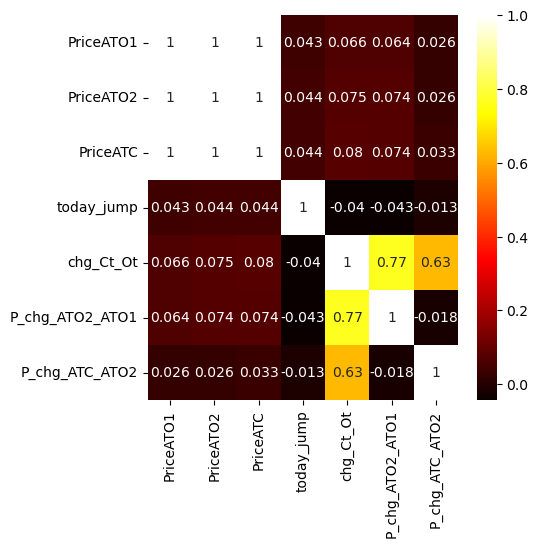

In [31]:
# Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(up_data.corr(),annot=True,cmap='hot')

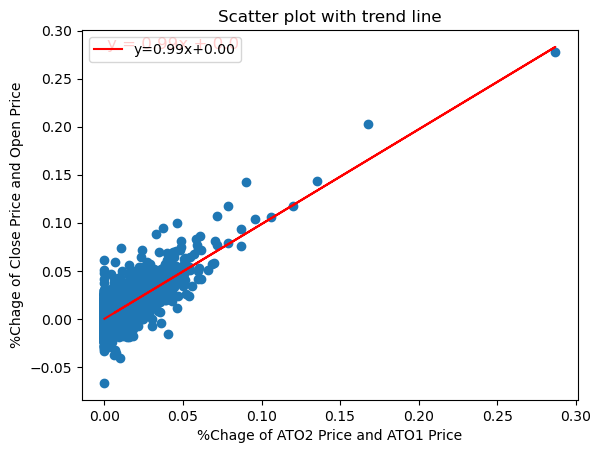

In [36]:
import numpy as np
from scipy import stats

# Create a scatter plot
plt.scatter(up_data['P_chg_ATO2_ATO1'], up_data['chg_Ct_Ot'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_data['P_chg_ATO2_ATO1'], up_data['chg_Ct_Ot'])

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add trend line
plt.plot(up_data['P_chg_ATO2_ATO1'], intercept + slope*up_data['P_chg_ATO2_ATO1'], 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Set the x and y axis labels
plt.xlabel('%Chage of ATO2 Price and ATO1 Price')
plt.ylabel('%Chage of Close Price and Open Price')

# Set the plot title and legend
plt.title('Scatter plot with trend line')
plt.legend()

# Add equation to the plot
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='r')

# Show the plot
plt.show()


# Machine learning

In [21]:
# Import library

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [38]:
# X = feature variables, y = a target variable

X = set50_clean[['P_chg_ATO2_ATO1','today_jump']]
y = set50_clean['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(17595, 2)
(17595,)


In [39]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (14076, 2)
y_train: (14076,)
X_test:  (3519, 2)
y_test:  (3519,)


### Model fitting

In [40]:
# Model fitting

# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)


LinearRegression()

### Model evaluation

In [41]:
# Model evaluation

# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0083
R-squared from Linear model : 0.6985


#### However, R-squared still low (0.60)

In [42]:
# Check variable importance 

# create a DataFrame to store the feature coefficients and absolute values
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': abs(li_model.coef_)})

# sort the coefficients by absolute value
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# print the sorted coefficients
print(coef_df)

           Feature  Coefficient
0  P_chg_ATO2_ATO1     0.964473
1       today_jump     0.016585


In [44]:
# get the coefficients of the fitted model
b0 = li_model.intercept_
b1, b2 = li_model.coef_

# print the equation of the fitted model
print(f'2 feature linear equation y = {b0:.4f} + {b1:.4f} * "P_chg_ATO2_ATO1" + {b2:.4f} * "today_jump"')

2 feature linear equation y = 0.0003 + 0.9645 * "P_chg_ATO2_ATO1" + -0.0166 * "today_jump"


## So I will backtesting the strategy

Buy on ATO2 when
- Afternoon opening price >= Morning opening price (`P_chg_ATO2_ATO1` >= 0) and
- When we calculate y = 0.0003 + 0.9645 * `P_chg_ATO2_ATO1` + -0.0166 * `today_jump`
- Must  "y - `P_chg_ATO2_ATO1`" > comission (0.3%)

Sell on today ATC

In [45]:
# Create predict % change of ATC from ATO1

up_data.loc[:, 'Pred_chg_Ct_Ot'] = 0.0003 + 0.9645 * up_data['P_chg_ATO2_ATO1'] -0.0166 * up_data['today_jump']

up_data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13768\2595048088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_data.loc[:, 'Pred_chg_Ct_Ot'] = 0.0003 + 0.9645 * up_data['P_chg_ATO2_ATO1'] -0.0166 * up_data['today_jump']


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0397,0.0000,0.0000,0.0000,-0.000359
10886,ADVANC,195.0,195.5,196.0,2021-09-30,-0.0076,0.0051,0.0026,0.0026,0.002934
15716,ADVANC,194.5,195.0,194.5,2021-10-04,-0.0051,0.0000,0.0026,-0.0026,0.002892
18131,ADVANC,194.5,197.0,196.0,2021-10-05,0.0000,0.0077,0.0129,-0.0051,0.012742
18936,ADVANC,194.0,197.0,196.0,2021-10-05,-0.0102,0.0103,0.0155,-0.0051,0.015419


In [46]:
# Expect gain

up_data.loc[:,'expect_gain'] = up_data['Pred_chg_Ct_Ot'] - up_data['P_chg_ATO2_ATO1']
up_data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13768\587664621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_data.loc[:,'expect_gain'] = up_data['Pred_chg_Ct_Ot'] - up_data['P_chg_ATO2_ATO1']


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot,expect_gain
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0397,0.0000,0.0000,0.0000,-0.000359,-0.000359
10886,ADVANC,195.0,195.5,196.0,2021-09-30,-0.0076,0.0051,0.0026,0.0026,0.002934,0.000334
15716,ADVANC,194.5,195.0,194.5,2021-10-04,-0.0051,0.0000,0.0026,-0.0026,0.002892,0.000292
18131,ADVANC,194.5,197.0,196.0,2021-10-05,0.0000,0.0077,0.0129,-0.0051,0.012742,-0.000158
18936,ADVANC,194.0,197.0,196.0,2021-10-05,-0.0102,0.0103,0.0155,-0.0051,0.015419,-0.000081


In [47]:
# Create action ticker by 1 = action, 0 = not action

import numpy as np

up_data['action'] = np.where((up_data['P_chg_ATO2_ATO1'] >= 0) & (up_data['expect_gain'] > 0.003), 1, 0)
up_data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13768\3162718782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_data['action'] = np.where((up_data['P_chg_ATO2_ATO1'] >= 0) & (up_data['expect_gain'] > 0.003), 1, 0)


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot,expect_gain,action
8427,ADVANC,196.5,196.5,196.5,2021-09-22,0.0397,0.0000,0.0000,0.0000,-0.000359,-0.000359,0
10886,ADVANC,195.0,195.5,196.0,2021-09-30,-0.0076,0.0051,0.0026,0.0026,0.002934,0.000334,0
15716,ADVANC,194.5,195.0,194.5,2021-10-04,-0.0051,0.0000,0.0026,-0.0026,0.002892,0.000292,0
18131,ADVANC,194.5,197.0,196.0,2021-10-05,0.0000,0.0077,0.0129,-0.0051,0.012742,-0.000158,0
18936,ADVANC,194.0,197.0,196.0,2021-10-05,-0.0102,0.0103,0.0155,-0.0051,0.015419,-0.000081,0


In [49]:
# Check trading or not

up_data['action'].value_counts()

0    10071
Name: action, dtype: int64

## Conclusion

- No trading happend

#### Next
- sSET stock 